In [5]:
import json
import glob
import matplotlib.pyplot as plt
import cv2

def dosing_present(frame):
    threshold = 50
    value = frame.mean()
    return bool(value > threshold)
    
annotation = json.loads(open('annotaion.json').read())
for node in annotation:
    roi = annotation[node]['dosing_roi']
    y0 = roi['y0']
    dy = roi['dy']
    x0 = roi['x0']
    dx = roi['dx']

    files = glob.glob('../../dataset/dosing*%s/*.png' % node)
    frame = cv2.imread(files[0])
    frame = frame[y0:y0+dy, x0:x0+dx, :]
    print(holder_present(frame, direction, x0, dx))
    
    files =  glob.glob('../dump/dosing*%s.png' % node)
    frame = cv2.imread(files[0])
    frame = frame[y0:y0+dy, x0:x0+dx, :]
    print(holder_present(frame, direction, x0, dx))
    
    


NameError: name 'holder_present' is not defined

0


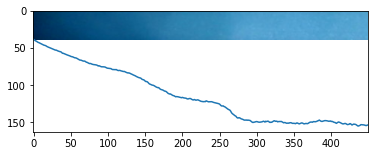

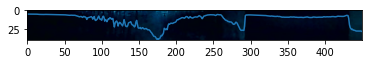

In [36]:
import json
import glob
import matplotlib.pyplot as plt
import cv2
annotation = json.loads(open('annotaion.json').read())
full = cv2.imread('../dump/sitright.png')
empty = cv2.imread('../dump/empty.png')
roi_dosing = annotation['106']['dosing_roi']

y_margin = 40
direction = 'riu'

y0 = int(roi_dosing['y0'] + (roi_dosing['dy'] / 2) - y_margin / 2)
dy = y_margin
dx = 450
x0 = (640 - dx - 40) if direction == 'liu' else 40
# full = full[y0:y0+dy, x0:x0+dx,:]
empty = empty[y0:y0+dy, x0:x0+dx,:]
plt.imshow(full)
frame = full.mean(axis=2).mean(axis=0)
print((frame<25).sum())
plt.plot(frame)
plt.figure()
plt.imshow(empty)
frame = empty.mean(axis=2).mean(axis=0)
plt.plot(frame)

142


{'result': False}

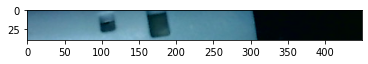

In [2]:
frame = cv2.imread('empty2.png')
frame = frame[120:160,640-450:640,:]
plt.imshow(frame)
brightness_threshold = 25
black_pixel_count = (frame.mean(axis=2).mean(axis=0) < brightness_threshold).sum()
print(black_pixel_count)
sit_wrong = 300 > black_pixel_count > 20
{'result': not sit_wrong}


151.6465034965035


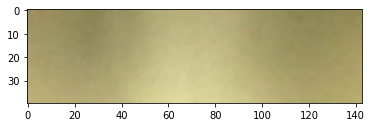

In [18]:
frame = cv2.imread('../dump/b.png')
roi =  {'x0': 303, 'dx': 143, 'y0': 0, 'dy': 40}
plt.imshow(frame)

frame = frame[roi['y0']:roi['y0']+roi['dy'], roi['x0']:roi['x0']+roi['dx'], ::-1]
print(frame.mean())
plt.imshow(frame)
